# Exploratory Data Analysis on IPL

Essential key steps to demonstrate in your Python Notebook
1. Loading data in to DataFrames. (Integration of SQL and Python if required)
2. Check the Data Types of your data columns.
3. Drop any NULL, missing values or unwanted columns.
4. Drop duplicate values.
5. Check for outliers using a box plot or histogram.
6. Plot features against each other using a pair plot.
7. Use a HeatMap for finding the correlation between the features(Feature to Feature).
8. Use a scatter plot to show the relationship between 2 variables.
9. Merging two Data Frames.
10. Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)
11. Representing data in matrix form.
12. Upload data to Numerical Python (NumPy)
13. Select a slice or part of the data and display.
14. Use conditions and segregate the data based on the condition (like show data of a feature(column) >,<,= a number)
15. Use mathematical and statistical functions using libraries.
16. Select data based on a category(categorical data based).
17. Libraries expected to try(minimum 4 required): Pandas, Numpy, Seaborn, Matplotlib .
18. Write your own functions and handle exceptions in the functions. 
19. Use of *arg and **kwargs.
20. Use of data functions. 
21. Create classes.

Website - https://data.world/vijayabhaskar/ipl-all-match-complete-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#To be done

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Problem Statement  <a class="anchor" id="section1">
In this python notebook, analysis of IPL matches from 2008 to 2020 is done using python packages like pandas, matplotlib and seaborn.  We have conducted an exploratory data analysis on two different datasets, for the purpose of determining what factors may have an impact on a teams chances of winning.  The factors we chose to analyze are as follows: Win rate, number of games played, result of the pre-game coin toss, and the venue.  We were also curious to know about additional factors, such as: highest performing players. 

## 2. Data Loading and Description <a class="anchor" id="section2">

**Some Background Information**

The Indian Premier League (IPL), is a professional Twenty20 cricket league in India contested during April and May of every year
by teams representing Indian cities and some states from 2008 to 2020. The dataset that we use in this notebook is matches.csv

**Importing Packages**

In [ ]:
import numpy as np                  # Implemennts milti-dimensional array and matrices
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

# To be added in our 2nd file
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/PythonMidterm/

 CricketMethods.py  'IPL Ball-by-Ball 2008-2020.csv'   __pycache__
 __init__.py	    'IPL Matches 2008-2020.csv'       'Python Midterm.ipynb'


In [ ]:
import os
os.chdir('/content/drive/My Drive/PythonMidterm/')
import CricketMethods as cri

**Importing the Dataset**

In [ ]:
try:
  ball_by_ball = pd.read_csv("/IPL Ball-by-Ball 2008-2020.csv")
except ValueError:
  print("file not found in directory")
ball_by_ball.head(2)


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
try:
  matches_data = pd.read_csv("/IPL Matches 2008-2020.csv")

except ValueError:
  print("file not found in directory")
matches_data.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [ ]:
print(f"This Dataset have {ball_by_ball.shape[0]} rows and {ball_by_ball.shape[1]} columns.")

This Dataset have 193468 rows and 18 columns.


In [ ]:
print(f"This Dataset have {matches_data.shape[0]} rows and {matches_data.shape[1]} columns.")

This Dataset have 816 rows and 17 columns.


## 3. Data Profiling

- __understanding our dataset__ using various pandas functionalities.
- __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 - Understanding the Dataset

Observing few rows and columns of data both from the starting and from the end


In [ ]:
ball_by_ball.shape

(193468, 18)

IPL matches ball by ball has 193468 rows and 18 columns

In [ ]:
matches_data.shape

(816, 17)

IPL matches data has 816 rows and 17 columns

In [ ]:
ball_by_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
ball_by_ball.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
matches_data.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [ ]:
ball_by_ball.tail(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193467,1237181,1,13,3,SS Iyer,RR Pant,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [ ]:
matches_data.tail(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [ ]:
ball_by_ball.info()

: 

In [ ]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [2]:
ball_by_ball.describe()

In [ ]:
matches_data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


### 3.2 - Preprocessing

In [ ]:
#checking null values
cri.find_null_values(ball_by_ball)

No of Null Values: 738056


In [ ]:
##checking null values
cri.find_null_values(matches_data)

No of Null Values: 843


- Dealing with missing values<br/>
    - Replacing missing entries of __City__ from the Venue Column.
    - Replacing __Rising Pune supergiant as Rising Pune supergiants__.
    - Replace city __Bengaluru to Bangalore__

In [ ]:
matches_data.columns.unique()

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

Rising Pune Supergiants is having 2 teams with different names (Rising Pune Supergiants and Rising Pune Supergiant)  replacing all values with same name Rising Pune Supergiants

In [ ]:
#Replacing Rising Pune Supergiant with Rising Pune Supergiants
cri.replace_values_for_consistency(matches_data)
matches_data.head(2)

       id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   

                         team1                  team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1              Kings XI Punjab    Chennai Super Kings   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
1          Chennai Super Kings           bat    Chennai Super Kings   runs   

   result_margin eliminator method    umpire1      umpire2  
0          140.0          N    NaN  Asad Rauf  RE Koertzen  
1           33.0          N    NaN  MR Benson   SL Shastri  


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


**Replacing Null values in CITY column from VENUE**

In [ ]:
cri.replace_values_for_consistency(matches_data)
matches_data.head(10)


: 

**Missing values of winner and player_of_match columns.**

In [ ]:
matches_data[matches_data['winner'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


As the matches had no result these columns would be left blank and no need to replace with any values.

**Replace city Bengaluru to Bangalore**

In [ ]:
matches_data.replace( 'Bengaluru', 'Bangalore',inplace = True)
matches_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Dubai', 'Sharjah'],
      dtype=object)

### 3.3 - Post Profiling<a class="anchor" id="section304">

In [ ]:
#display team names and column names
cri.display_post_profiling(matches_data)

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Delhi Capitals']


##4. Questions

### 4.1 - Total matches played by each team  <a class="anchor" id="section403">

In [ ]:
matches_played = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
matches_played


Chennai Super Kings            178
Deccan Chargers                 75
Delhi Capitals                  33
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          192
Mumbai Indians                 203
Pune Warriors                   46
Rajasthan Royals               161
Rising Pune Supergiants         30
Royal Challengers Bangalore    195
Sunrisers Hyderabad            124
dtype: int64

### 4.2 - How many matches won by each team ?  <a class="anchor" id="section404">

In [ ]:
matches_won = matches_data.groupby('winner').count()
matches_won["id"]

winner
Chennai Super Kings            106
Deccan Chargers                 29
Delhi Capitals                  19
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders           99
Mumbai Indians                 120
Pune Warriors                   12
Rajasthan Royals                81
Rising Pune Supergiants         15
Royal Challengers Bangalore     91
Sunrisers Hyderabad             66
Name: id, dtype: int64

### 4.3 - Comparison between Number of matches won by each team and total matches played <a class="anchor" id="section405">

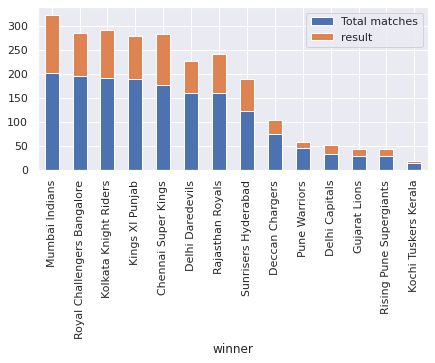

In [ ]:
cri.matches_won_total_matches(matches_data, matches_won, matches_played)

### 4.4 - Success Rate of each team <a class="anchor" id="section406">

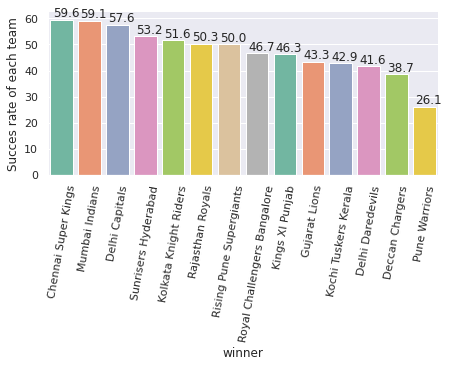

In [ ]:
match_succes_rate = (matches_won["id"]/matches_played)*100
#print(match_succes_rate)

data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)


__Chennai Super Kings__ have highest winning success rate __(59.6%)__ , followed by Mumbai Indians __(59.1%)__.  Without doing a full statistical analysis, it seems clear that the teams that play more games tend to have a higher win percentage. 

### 4.5 - Top 10 high performing Players <a class="anchor" id="section415">

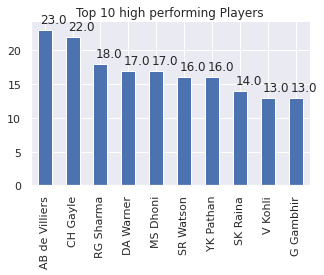

In [ ]:
plt.figure(figsize=(5,3))

ax = matches_data['player_of_match'].value_counts()[:10].plot.bar()
plt.title('Top 10 high performing Players')
annot_plot(ax,0.08,1)

__AB de Villers__ has won Player of the match  __23__ times followed by  __CH Gayle__ who had won __22__ times.

### 4.6 - Toss winning success rate of each team <a class="anchor" id="section416">

Text(0.5, 1.0, 'Toss winning success rate of each team')

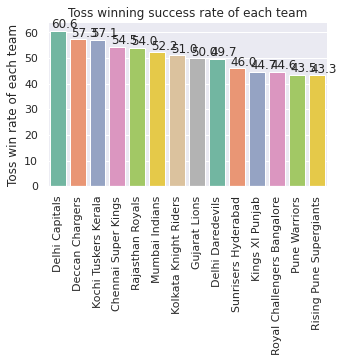

In [ ]:
toss_won = matches_data['toss_winner'].value_counts()
toss_win_rate = (toss_won/matches_played)*100
data = toss_win_rate.sort_values(ascending = False)
plt.figure(figsize=(5,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Toss win rate of each team')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)
plt.title('Toss winning success rate of each team')

__Delhi Capitals__ has the highest Toss winning success rate of __60.6%__ and __Rising Pune Supergaints__ has the least toss winning success rate of __43.3%__.

### 4.7 - Checking Corelation in Ball By Ball database <a class="anchor" id="section406">

In [ ]:
corelation = ball_by_ball.corr()

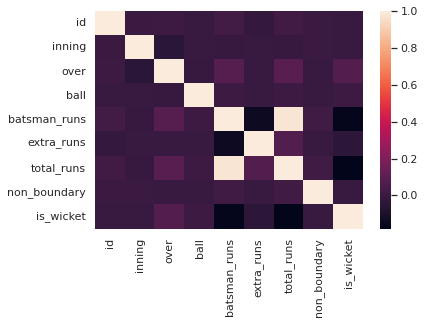

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns)

###4.8 - Most Runs Scored

In [ ]:
most_runs = ball_by_ball.groupby(['id'])['total_runs'].sum().reset_index()

# Ascending Order
cri.runs_scored_ascending(most_runs)

# Descending Order
cri.runs_scored_descending(most_runs)

          id  total_runs
241   501265          56
744  1178424         103
39    336021         135
611  1082626         135
411   729305         141
..       ...         ...
1     335983         447
791  1216527         449
626  1082641         453
679  1136604         459
146   419137         469

[816 rows x 2 columns]
          id  total_runs
146   419137         469
679  1136604         459
626  1082641         453
791  1216527         449
1     335983         447
..       ...         ...
411   729305         141
611  1082626         135
39    336021         135
744  1178424         103
241   501265          56

[816 rows x 2 columns]


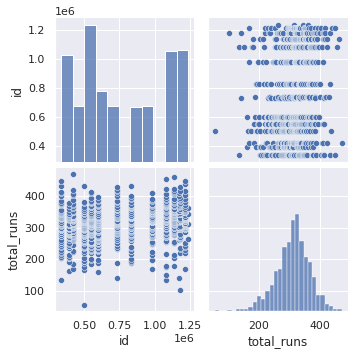

In [ ]:
sns.pairplot(asc_most_runs)

### 4.9 - Toss Decision across matches <a class="anchor" id="section417">

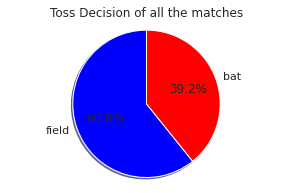

In [ ]:
toss=matches_data['toss_decision'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['blue', 'red']

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Decision of all the matches')
plt.axis('equal')
plt.show()

__60.8%__ of the toss winning teams have opted for __Feilding__ while __39.2%__ have opted for __Batting__.

### 4.10 - How toss winning affects the match winner <a class="anchor" id="section420">

In [ ]:
tosswin_win = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
total_matches=matches_data['id'].count()
Success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )


Number of matches in which Toss winner is the game winner is : 418 out of 816  ie., 51.225490196078425 %


###  4.11 - Toss Decision  in which Toss winner is the game winner<a class="anchor" id="section421">

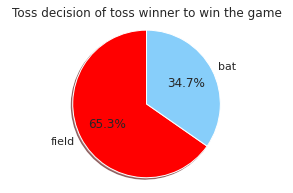

In [ ]:
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(tosswin_winner.index)
sizes = tosswin_winner.values
colors = ['red', 'lightskyblue']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss decision of toss winner to win the game')
plt.axis('equal')
plt.show()

__65.3%__ of the toss winning teams had decided to __field__ first while __34.7%__ had decided to __Bat__ first and won the matches.

### 4.12 - Top 10 Cities to hold match <a class="anchor" id="section422">

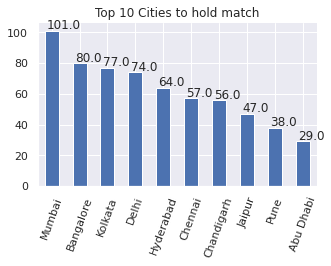

In [ ]:
plt.figure(figsize=(5,3))

ax=matches_data['city'].value_counts()[:10].plot.bar()
plt.title('Top 10 Cities to hold match')
plt.xticks(rotation=70)
annot_plot(ax,0.08,1)

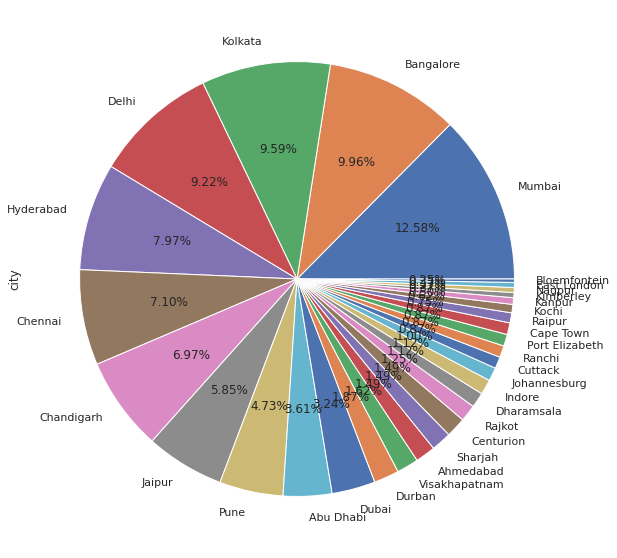

In [ ]:
plt.figure(figsize=(15,10))
matches_data['city'].value_counts().plot.pie(autopct="%0.2f%%")

__Mumbai__ had hold highest number of matches (__101.0__) followed by __Bangalore (80.0)__.

### 4.13 - In which city does each team has won more matches ?<a class="anchor" id="section423">

In [ ]:
a = matches_data.groupby(['winner','city']).size().reset_index(name='win_counts')
a = a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)

,winner,city,win_counts
136,Mumbai Indians,Mumbai,53
117,Kolkata Knight Riders,Kolkata,45
4,Chennai Super Kings,Chennai,40
177,Royal Challengers Bangalore,Bangalore,37
160,Rajasthan Royals,Jaipur,32
203,Sunrisers Hyderabad,Hyderabad,30
81,Kings XI Punjab,Chandigarh,30
52,Delhi Daredevils,Delhi,27
173,Rising Pune Supergiants,Pune,5
147,Pune Warriors,Pune,4


Teams had won more matches in their home grounds.

### 4.14 - Top 10 venue to hold matches <a class="anchor" id="section424">

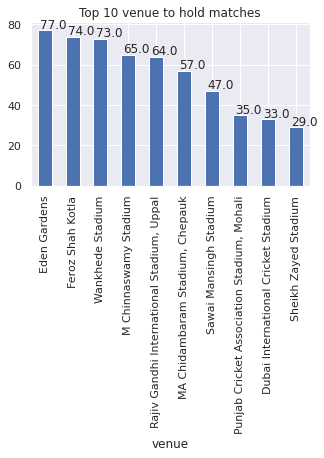

In [ ]:
#top 10 venue to hold max number of matches
plt.figure(figsize=(5,3))
venue=matches_data.groupby('venue')["id"].count()
ax =venue.sort_values(ascending=False).head(10).plot.bar(figsize=(5,3))
plt.title('Top 10 venue to hold matches')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

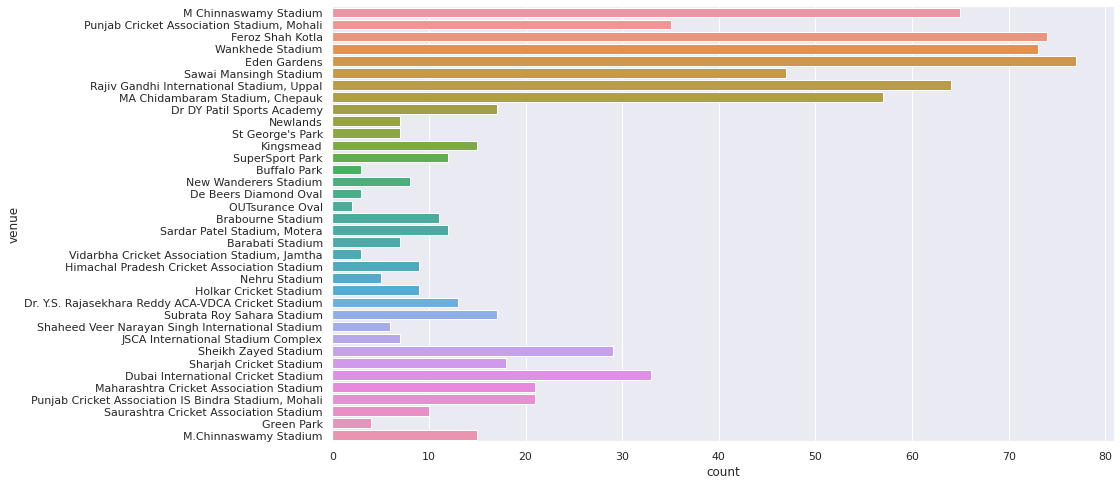

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y = 'venue',data = matches_data)

__Eden Gardens__ had hold highest number of matches (__77.0__) followed by __Feroz Shah Kotla (74.0)__.

### 4.15 - Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue <a class="anchor" id="section425">

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

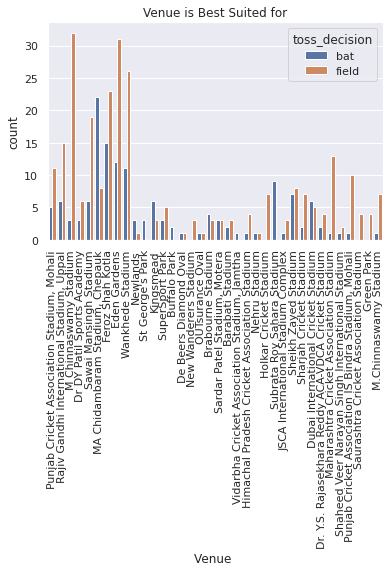

In [ ]:
venue_suit_for = matches_data[matches_data['toss_winner'] == matches_data['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue_suit_for)
plt.xlabel('Venue ')
plt.title('Venue is Best Suited for')
plt.xticks(rotation=90)

__M Chinnaswamy stadium and Eden Gardens__ is best Suited for Feilding and __MA Chidambaram Stadium ,Chepauk__ is best suited for Batting.

### 4.16 - Match Results : Normal , tie and no result <a class="anchor" id="section426">

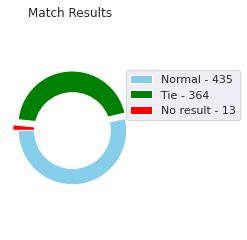

In [ ]:
result=matches_data['result'].value_counts().tolist()
names='Normal - '+str(result[0]), 'Tie - '+str(result[1]), 'No result - '+str(result[2]), 

fig, ax = plt.subplots(figsize=(3.5,3.5))  
# Create a pieplot
explode = (0, 0.01, 0.01)
ax1,text=ax.pie(result,labeldistance=2,explode=explode,radius=0.1, startangle=180,colors=['skyblue','green','red'])
#plt.show()
ax.axis('equal')
ax.set_title("Match Results") 

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.07, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(ax1, names,  bbox_to_anchor=(.9,.8), loc=2)
plt.tight_layout()
plt.show()

### 4.17 - Combining 2 Data Frames

In [ ]:
IplData = ball_by_ball[['id']].merge(matches_data, left_on = 'id',right_on = 'id',how = 'left')
IplData.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


### 4.18 - Runs Vs Wickets in combined Data Frame

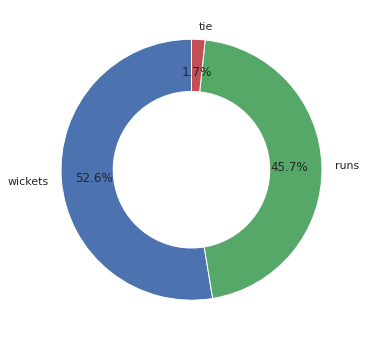

In [ ]:
plt.figure(figsize=(6,6))
sizes = IplData.result.value_counts()
labels = IplData.result.value_counts().index
plt.pie(sizes,colors = ['b','g','r'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         )

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### 4.19 - Histogram and PairPlot in Data Frames

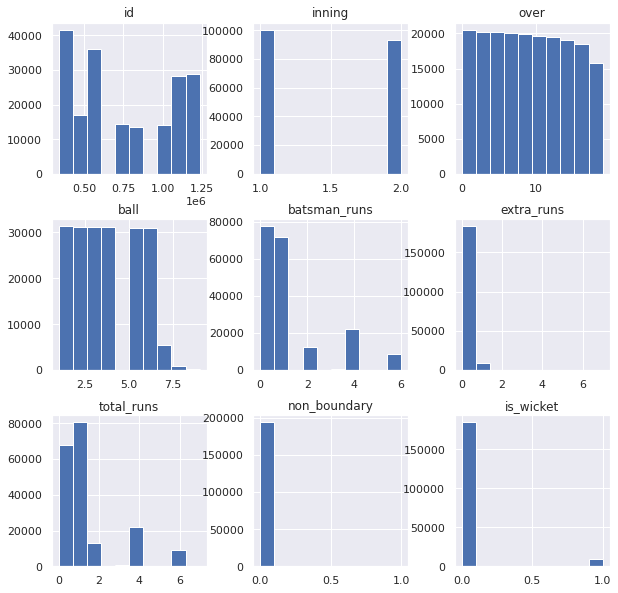

In [ ]:
ball_by_ball.hist(figsize=(10,10))
plt.show()

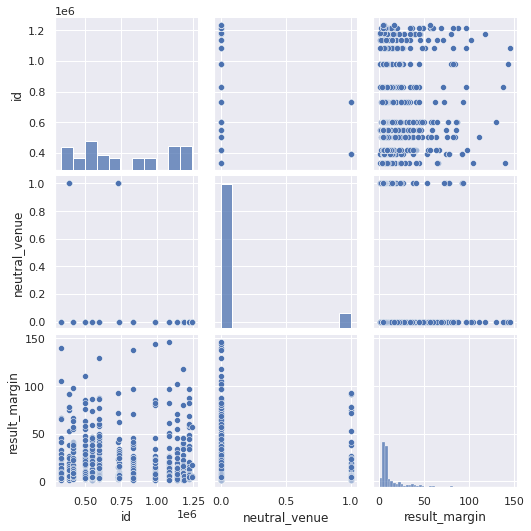

In [ ]:
sns.pairplot(matches_data)

### 4.20 - Matrix Graph for Data Frame

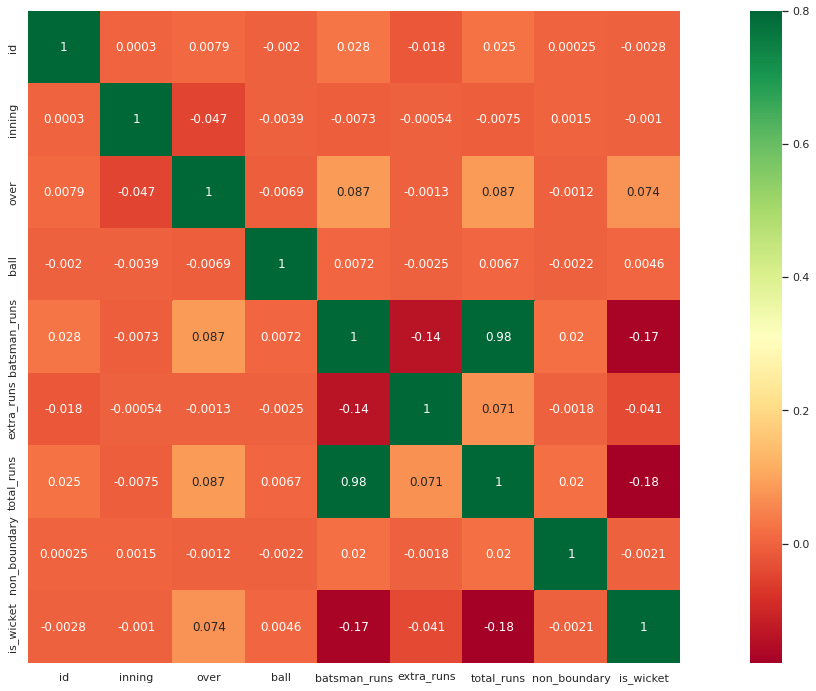

In [ ]:
matrix = ball_by_ball.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

### 4.21 - Top 5 Umpire 

Text(0, 0.5, 'Top 5 Umpire 2')

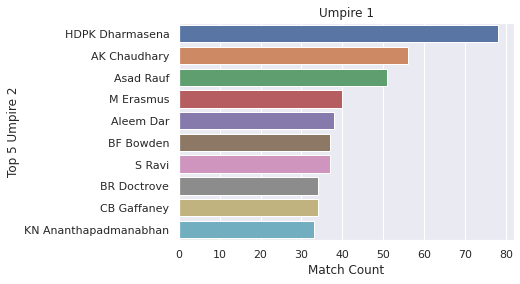

In [ ]:
sns.barplot(x = matches_data['umpire1'].value_counts().head(10).values, y = matches_data['umpire1'].value_counts().head(10).index, data = matches_data)
plt.title("Umpire 1")
plt.xlabel("Match Count")
plt.ylabel("Top 5 Umpire 2")

Text(0, 0.5, 'Top 5 Umpire 2')

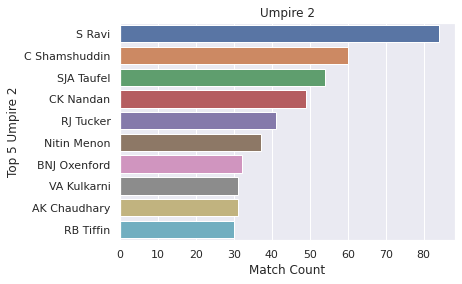

In [ ]:
sns.barplot(x = matches_data['umpire2'].value_counts().head(10).values, y = matches_data['umpire2'].value_counts().head(10).index, data = matches_data)
plt.title("Umpire 2")
plt.xlabel("Match Count")
plt.ylabel("Top 5 Umpire 2")

### 4.22 - Cross Tab Plot

Toss Winner Vs Toss Decision

In [ ]:
pd.crosstab(matches_data['toss_winner'],matches_data['toss_decision']).style.background_gradient(cmap = 'spring')

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,51,46
Deccan Chargers,24,19
Delhi Capitals,7,13
Delhi Daredevils,29,51
Gujarat Lions,1,14
Kings XI Punjab,27,58
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,34,64
Mumbai Indians,48,58


Team1 Vs Team2

In [ ]:
pd.crosstab(matches_data['team1'],matches_data['team2']).style.background_gradient(cmap = 'autumn')

team2,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
team1,,,,,,,,,,,,,,
Chennai Super Kings,0,7,3,10,0,12,1,10,17,3,13,0,11,7
Deccan Chargers,3,0,0,6,0,6,0,6,6,2,6,0,4,0
Delhi Capitals,2,0,0,0,0,3,0,2,4,0,3,0,2,3
Delhi Daredevils,8,5,0,0,2,12,1,12,12,3,10,2,10,6
Gujarat Lions,0,0,0,2,0,2,0,2,2,0,0,2,3,3
Kings XI Punjab,11,4,1,10,2,0,0,13,13,3,13,2,12,8
Kochi Tuskers Kerala,1,1,0,1,0,1,0,1,0,0,1,0,1,0
Kolkata Knight Riders,12,3,2,9,2,14,1,0,14,2,13,2,12,9
Mumbai Indians,13,4,2,10,2,13,1,13,0,3,13,4,10,9


Batsman vs The wickets they have taken 

In [ ]:
pd.crosstab(ball_by_ball['batsman'],ball_by_ball['is_wicket']).style.background_gradient(cmap = 'seismic')

is_wicket,0,1
batsman,,
A Ashish Reddy,181,15
A Chandila,6,1
A Chopra,70,5
A Choudhary,18,2
A Dananjaya,5,0
A Flintoff,55,2
A Kumble,47,2
A Mishra,380,30
A Mithun,21,5


Batsman and there total runs

In [ ]:
pd.crosstab(ball_by_ball['batsman'],ball_by_ball['batsman_runs']).style.background_gradient(cmap = 'PRGn')

batsman_runs,0,1,2,3,4,5,6
batsman,,,,,,,
A Ashish Reddy,61,83,20,1,16,0,15
A Chandila,3,4,0,0,0,0,0
A Chopra,45,21,2,0,7,0,0
A Choudhary,4,13,1,0,1,0,1
A Dananjaya,2,2,1,0,0,0,0
A Flintoff,24,23,2,1,5,0,2
A Kumble,24,21,1,0,3,0,0
A Mishra,182,172,22,0,29,0,5
A Mithun,11,8,2,0,4,0,1


### 4.23 - Cat Plot

####The team won both match and toss

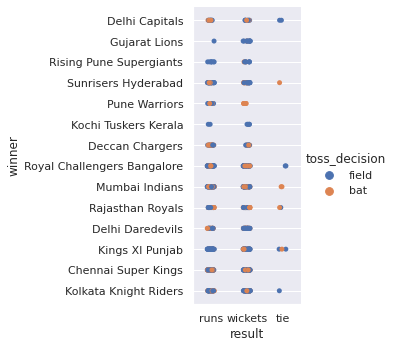

In [ ]:
sns.catplot(x = "result", y = "winner", hue = "toss_decision", data = matches_data)

## 4. Conclusion

*   The success rate of Rising Pune Supergiants is good compeatively amoung the new teams.
*   Royal Challengers Bangalore
 and Chennai Super Kings are best defending team.
*   From the year 2014 most of the teams are opting to field after winning the toss and are also successful in winning matches.
*   Overall Chennai Super Kings and Mumbai Indians have high success rate.
*   From the analysis we can see that Chennai Super Kings and Mumbai Indians are more likely to win upcomin IPL seasons. 



To conclude, we found that there is likely a correlation between number of games played and number of games won. Additionally, it seems beneficial for teams to win the coin toss at the beginning of each game.  
